In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(
host = "127.0.0.1",
user = "root",
password = "PaSta!521",
database = "PortfolioProject"
)

cursor = db.cursor()
print(db)

def run_query(query):
    cursor.execute(query)
    rows = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    return pd.DataFrame(rows, columns=columns)

## Employee Wellness & Mental Health Analysis 

### Introduction

I’m currently on a new journey, one that’s pushed me to rediscover how much I genuinely enjoy working with data. As I transition from a QA analyst into a data-focused role, I’m also learning a lot about what I value in my work life: how I want to work, where I want to work, and how that fits into my personal life.

Over the past few years, the way we work, especially in the United States, has changed dramatically. Remote work became widely accepted after COVID, and many of us got the chance to experience what it feels like to have more flexibility. All of my previous roles have been remote, and having that flexibility played a major role in my ability to stay present in both my home life and my life outside of work. As I search for my next opportunity, I’ve been reflecting on how much work environments shape not just productivity, but overall well-being.

That’s why I chose this project.

I wanted to analyze how different work environments: remote, hybrid, and on-site might influence mental health risk and overall well-being. This dataset gave me an opportunity to tie together where I am in my own career journey with a topic that feels meaningful and relevant right now. Ultimately, the goal of this analysis is to understand how where we work might impact how we feel, how we function, and how supported we are in our day-to-day lives.

### Business Question

The primary question that needs to be answered is: how do different work environments influence mental heatlh risk and well-being indicators among employees?

To answer this question, I broke down the problem into smaller analytical questions:

- Which work environment has the highest proportions of high-risk employees?
- Do stress, sleep, anxiety, and depression levels differ across work enviornments?
- Is one type of work environment associated with better productivity?
- Which well-being factors are most associated with high, medium, and low mental health risk categories?

These questions helped me stick to the business question and guided my SQL queries 

### Data Exploration

#### How the Data Was Collected

The data was collected from a Kaggle dataset which explores the relationship between workplace conditions and employee mental heatlh. The creator notes that the dataset was designed to analyze how factors such as stress, depression, productivity, anxiety, and sleep vary across different work environments which includes remote, hybrid, and on-site settings. The dataset includes individual self-reported metrics and a classified mental health risk level (Low, Medium, High), allowing for meaningful exploration of how workplace structure may influence an individuals overall well-being.

#### Important Features Identified for Analysis

To answer the business question, I selected features directly tied to psychological health and work performance. Stress level, sleep hours, anxiety score, and depression score were included because they are core indicators of overall mental well-being. I incorporated the productivity score to explore whether workplace environments that support mental health also support performance. Mental health risk was used as a classification variable that summarizes these factors. Combining these features together allows for a focused and meaningful analysis of how remote, hybrid, and on-site work environments affect employee well-being.

### Methodology

I began the analysis by exploring the dataset in Excel to familiarize myself with the structure of the data, review each column, and identify what kinds of questions the dataset could answer. This initial exploration helped me understand the distribution of key variables such as stress, depression, anxiety, sleep hours, and work environment, and then guided the development of meaningful sub-questions that support the overall business question. 

Since the dataset from Kaggle was already clean, minimal preprocessing was required. After reviewing the data, I imported the CSV file into SQL, where I conducted the majority of the analysis, wrote queries to calculate averages, counts, and percentages, and examined how workplace conditions affect mental health risk and employee well-being.

#### SQL Analysis (More Details)

I used SQL to make sure the csv file was imported properly and the table looked like the dataset being used. SQL queries were created to answer the initial business question. SQL was used to: 

- Only look at employed individuals in the different work environments 
- Average the stress level, sleep hours, depression scores, anxiety scores, and productivity scores
- Count number of employees by mental health risk category
- Percent of high-risk and low-risk workers by work environment
- Average well-being indicators by environment
- Analyze the productivity differences between remote, hybrid, and on-site employees

#### Tableau for Data Visualization

Working through the SQL queries first helped me understand the story hidden in the data and made it easier to decide which insights were most important to visualize. SQL allowed me to see clear patterns around stress, productivity, and mental health risk, which guided the types of charts I created later on.

I imported the dataset into Tableau and built visualizations that highlighted the key findings from my analysis such as differences in productivity, sleep, stress, and mental health risk across work environments. Using Tableau allowed me to present the results in a clear way while staying closely connected to the patterns uncovered in my SQL exploration.

### Summary of Insights

After running extensive SQL queries on our employee wellness dataset, one insight jumped out immediately. Mental health challenges are showing up across all work environments, not just one or two. While there are measurable differences between hybrid, on-site, and remote settings, honestly? They're much smaller than you'd expect.

Here's what actually matters: the biggest, most meaningful differences don't emerge when I compared work locations. They emerge when I compared employees by their mental health risk levels. In other words, the who matters far more than the where.

### Full Analysis

This section summarizes the key findings from the SQL analysis and Tableau visualizations. The results focus on answering the central business question: **How do different workplace environments influence employee mental health and overall well-being?** There are 6 questions I analyzed based around the central question.

#### Question #1: What factors are associated with mental health risk levels?
This questions examines how stress, sleep, anxiety, depression, and anxiety differ across high, medium, and low mental health risk categories.

In [46]:
run_query("""

SELECT mental_health_risk,
ROUND(AVG(stress_level), 2) AS Average_Stress_Level,
ROUND(AVG(sleep_hours), 2) AS Average_Sleep_Hours,
ROUND(AVG(depression_score), 2) AS Average_Depression_Score,
ROUND(AVG(productivity_score), 2) AS Average_Productivity_Score,
ROUND(AVG(anxiety_score), 2) AS Average_Anxiety_Score
FROM mental_health
WHERE employment_status = 'employed'
GROUP BY mental_health_risk;          

""")

,mental_health_risk,Average_Stress_Level,Average_Sleep_Hours,Average_Depression_Score,Average_Productivity_Score,Average_Anxiety_Score
0,High,5.65,6.44,24.56,63.19,15.47
1,Medium,5.59,6.47,14.26,78.52,10.23
2,Low,5.57,6.39,4.68,92.49,4.53


### Insight 

The data reveals that while overall stress, sleep, anxiety, depression, and productivity levels do not differ dramatically across hybrid, on-site, and remote work environments, there are important patterns that emerge when mental health risk levels and well-being indicators are examined more closely.

#### Question 2: How is mental health risk distributed across work environment?

In [47]:
run_query("""

SELECT work_environment, mental_health_risk, COUNT(*) AS total_mental_risk_workers
FROM mental_health
WHERE employment_status = 'Employed'
GROUP BY work_environment, mental_health_risk
ORDER BY work_environment ASC, total_mental_risk_workers ASC;

""")

,work_environment,mental_health_risk,total_mental_risk_workers
0,Hybrid,Low,203
1,Hybrid,High,296
2,Hybrid,Medium,668
3,On-site,Low,524
4,On-site,High,659
5,On-site,Medium,1764
6,Remote,Low,290
7,Remote,High,448
8,Remote,Medium,1016


### Insights:

When I looked at how mental health risk is distributed across each work environment, one pattern stood out: medium risk is the most common category no matter where people work. On-site employees make up the largest share overall, so naturally they have the highest counts across all three risk levels.

Medium risk is the dominant category, followed by high risk, then low risk.

This tells me that the work environment itself isn’t shifting mental health risk dramatically. The overall pattern of risk stays consistent regardless of where someone works.

#### Question 3: How do well-being factors (stress, anxiety, depression, sleep) differ by work environment?

In [100]:
run_query("""

SELECT work_environment, 
COUNT(*) AS Total_Employee,
ROUND(AVG(stress_level), 2) AS Avg_Stress_Level, 
ROUND(AVG(anxiety_score), 2) AS Avg_Anxiety_Score, 
ROUND(AVG(depression_score), 2) AS Avg_Depression_Score, 
ROUND(AVG(sleep_hours), 2) AS Avg_Sleep_Hours, 
ROUND(AVG(productivity_score), 2) AS Avg_Productivity_Score
FROM mental_health
WHERE employment_status = 'Employed'
GROUP BY work_environment
ORDER BY work_environment ASC, Total_Employee ASC;

""")

,work_environment,Total_Employee,Avg_Stress_Level,Avg_Anxiety_Score,Avg_Depression_Score,Avg_Sleep_Hours,Avg_Productivity_Score
0,Hybrid,1167,5.56,10.48,15.28,6.39,76.87
1,On-site,2947,5.59,10.32,15.00,6.46,77.35
2,Remote,1754,5.63,10.80,15.02,6.46,77.42


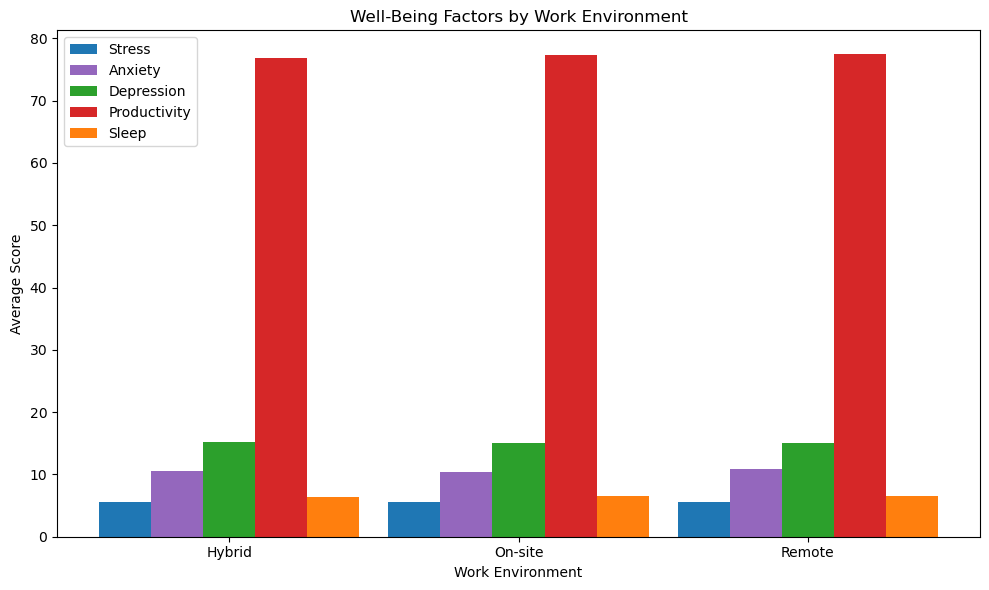

In [127]:
df_env = pd.DataFrame({
    "work_environment": ["Hybrid", "On-site", "Remote"],
    "Avg_Stress_Level": [5.56, 5.59, 5.63],
    "Avg_Anxiety_Score": [10.48, 10.32, 10.80],
    "Avg_Depression_Score": [15.28, 15.00, 15.02],
    "Avg_Sleep_Hours": [6.39, 6.46, 6.46],
    "Avg_Productivity_Score": [76.87, 77.35, 77.42]
})

plt.figure(figsize=(10,6))

x = np.arange(len(df_env["work_environment"]))
width = 0.18

plt.bar(x - 2*width, df_env["Avg_Stress_Level"], width, label = "Stress", color = "#1f77b4")
plt.bar(x - 1*width, df_env["Avg_Anxiety_Score"], width, label = "Anxiety", color = "#9467bd")
plt.bar(x + 0*width, df_env["Avg_Depression_Score"], width, label = "Depression", color = "#1f77b4")
plt.bar(x + 1*width, df_env["Avg_Productivity_Score"], width, label = "Productivity", color = "#d62728")
plt.bar(x + 2*width, df_env["Avg_Sleep_Hours"], width, label = "Sleep", color="#ff7f0e")

plt.xticks(x, df_env["work_environment"])
plt.xlabel("Work Environment")
plt.ylabel("Average Score")
plt.title("Well-Being Factors by Work Environment")
plt.legend()
plt.tight_layout()
plt.show()

### Insights:

When I broke down the well-being factors: stress, anxiety, depression, sleep, and productivity by work environment, the first thing I noticed was how similar the numbers are across Hybrid, On-site, and Remote employees. The differences are there, but they’re very subtle, which tells me that the environment itself isn’t the biggest driver of how people are feeling day to day.

When looking at stress, hybrid employees averaged a stress score of 5.56, On-site came in at 5.59, and Remote was 5.63. These numbers are essentially the same, which shows that employees are experiencing stress regardless of where they work, and no matter how small.

Anxiety and depression follow this same pattern with anxiety with having extremely small differences. This surprised me a bit because we tend to assume remote or hybrid work dramatically changes emotional well-being for the better, but the data shows that the underlying mental health concerns remain fairly consistent across environments.

Sleep averages were also almost identical across work environments. Even with different daily routines, people seem to get roughly the same amount of sleep. So in turn, there wasn't a huge correlation between sleep and the work environments.

Productivity scores ranged from 76.87 to 77.42, which is essentially a flat line. This reinforces the idea that people remain productive whether they're in the office, at home, or doing a mix of both.

#### Question 4: How many employees in each work environment are highly stressed?

In [101]:
run_query("""

SELECT 
    work_environment,
    ROUND(AVG(stress_level), 2) AS avg_stress_level,
    COUNT(*) AS Total_Employed,
    SUM(CASE WHEN stress_level >= 7 THEN 1 ELSE 0 END) AS high_stress_count,
    ROUND(SUM(CASE WHEN stress_level >= 7 THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) AS percent_high_stress
FROM mental_health
WHERE employment_status = 'Employed'
GROUP BY work_environment;

""")

,work_environment,avg_stress_level,Total_Employed,high_stress_count,percent_high_stress
0,On-site,5.59,2947,1240,42.08
1,Remote,5.63,1754,734,41.85
2,Hybrid,5.56,1167,472,40.45


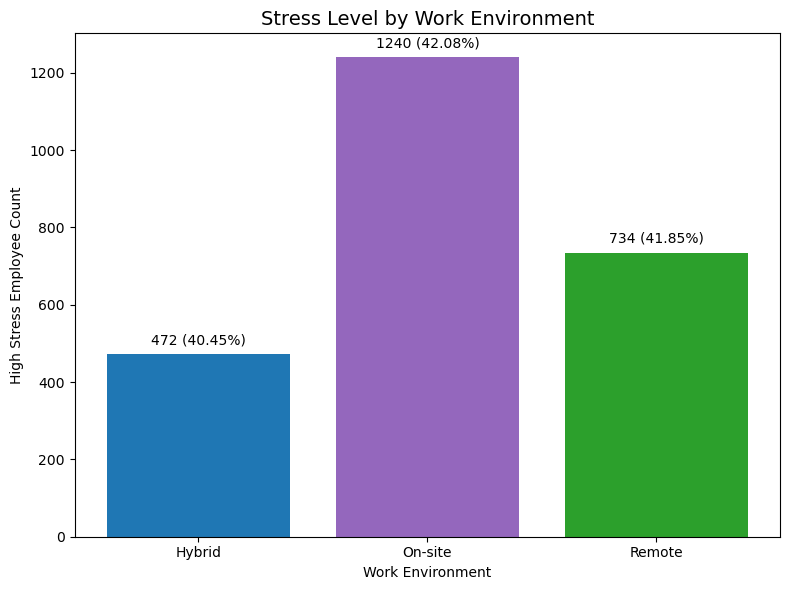

In [124]:
df_stress = pd.DataFrame({
    "work_environment": ["Hybrid", "On-site", "Remote"],
    "high_stress_count": [472, 1240, 734],
    "percent_high_stress": [40.45, 42.08, 41.85]
})

plt.figure(figsize=(8,6))

# Create bars
bars = plt.bar(df_stress["work_environment"], 
               df_stress["high_stress_count"], 
               color=["#1f77b4", "#9467bd", "#2ca02c"])

labels = (
    df_stress["high_stress_count"].astype(str)
    + " (" 
    + df_stress["percent_high_stress"].astype(str)
    + "%)"
)

# Add labels 
plt.bar_label(bars, labels=labels, padding=5)

plt.title("Stress Level by Work Environment", fontsize=14)
plt.xlabel("Work Environment")
plt.ylabel("High Stress Employee Count")

plt.tight_layout()
plt.show()

### Insights 

When I looked at average stress levels by work environment, the numbers barely moved in terms of percentage. While the amount of employees who worked in the different work environments were significantly different, the percentage of people who are stressed was not a drastic change. The differences by percentage is almost small that it doesn't particularly matter, and this shows that stress is not something that is tied to whether you work in an office or whether you work from home. 

Those stressors may look different, for example, the stresses of having to communte to work or if an employee works on-site or just the stresses of an employees personal life if they work remotely. Being stressed is not just happening to one type of employee in a work environment. It is happening across the board.

However, even though the percentages are close, the on-site group stands out simply because there are more employees in that category overall. But it also hints at possible indicators that drive stress like commuting, office noise, lack of privacy, rigid schedules which are things remote and hybrid workers deal with less.

#### Question 5: Is productivity different across work environments?

In [52]:
run_query("""

SELECT work_environment,
COUNT(*) total_employed,
ROUND(AVG(productivity_score), 2) AS avg_productivity_score
FROM mental_health
WHERE employment_status = 'Employed'
GROUP BY work_environment;

""")

,work_environment,total_employed,avg_productivity_score
0,On-site,2947,77.35
1,Remote,1754,77.42
2,Hybrid,1167,76.87


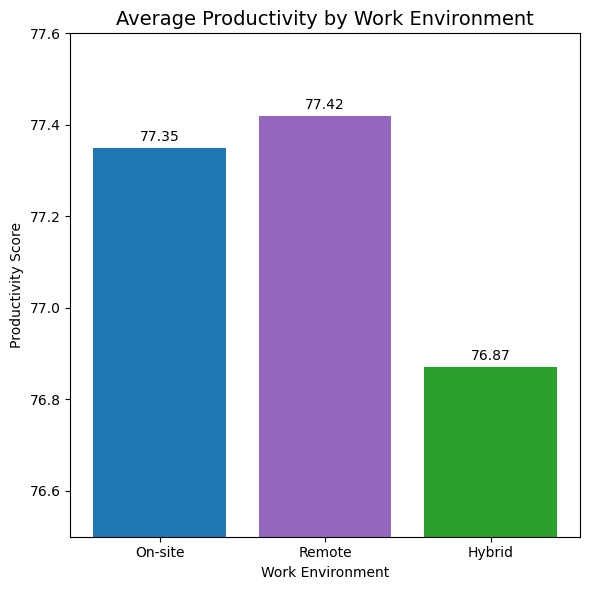

In [123]:
df_prod = pd.DataFrame({
    "work_environment": ["On-site", "Remote", "Hybrid"],
    "avg_productivity_score": [77.35, 77.42, 76.87]
})


plt.figure(figsize = (6,6))

bars = plt.bar(df_prod["work_environment"],
               df_prod["avg_productivity_score"],
               color=["#1f77b4", "#9467bd", "#2ca02c"])

plt.bar_label(bars, padding=3)

plt.ylim(76.5, 77.6)

plt.title("Average Productivity by Work Environment", fontsize=14)
plt.xlabel("Work Environment")
plt.ylabel("Productivity Score")

plt.tight_layout()
plt.show()

### Insights: 

This was pretty interesting to see. When I analyzed and ran my SQL query to see if there was a correlation between an employee's productivity and their work environment, the scores were again extremely close. 

**(For the purposes of being able to see the difference between the work environments, the scale for the graph started between the mininmum and maximum productivity score)**

This tells me that employees are capable of being productive in any environment. Remote work doesn’t harm productivity, and on-site work doesn’t magically boost it. Employers can offer flexibility without worrying about work performance dropping.

#### Question 6: Does sleep differ by work environment?

In [53]:
run_query("""

SELECT work_environment, 
COUNT(*) AS total_employed,
ROUND(AVG(sleep_hours), 2) AS avg_sleep_hours
FROM mental_health
WHERE employment_status = 'Employed'
GROUP BY work_environment;

""")

,work_environment,total_employed,avg_sleep_hours
0,On-site,2947,6.46
1,Remote,1754,6.46
2,Hybrid,1167,6.39


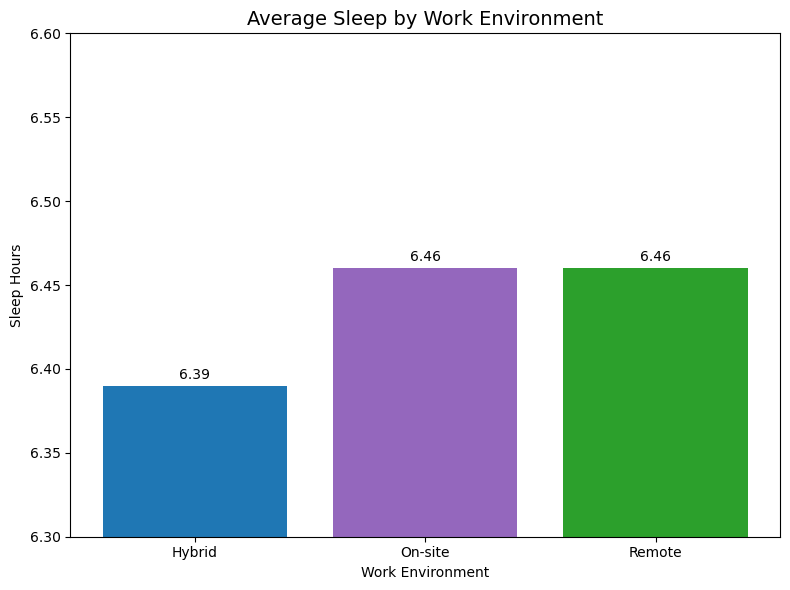

In [131]:
df_sleep = pd.DataFrame({
    "work_environment": ["Hybrid", "On-site", "Remote"],
    "avg_sleep_hours": [6.39, 6.46, 6.46],
})

plt.figure(figsize=(8,6))

# Create bars
bars = plt.bar(df_sleep["work_environment"], 
               df_sleep["avg_sleep_hours"], 
               color=["#1f77b4", "#9467bd", "#2ca02c"])

plt.bar_label(bars, padding=3)

plt.ylim(6.3, 6.6)

plt.title("Average Sleep by Work Environment", fontsize=14)
plt.xlabel("Work Environment")
plt.ylabel("Sleep Hours")

plt.tight_layout()
plt.show()


### Insights

When I looked at how much sleep employees get in different work environments, the results were almost identical across the board. No matter where people work, hybrid, on-site, or remote, the amount of sleep they’re getting doesn’t really change.

These numbers are so close that the differences are barely meaningful. Hybrid employees sleep just slightly less, but we’re talking about a difference of 0.07 hours, which is around 4 minutes. That’s not enough to suggest that the work environment has any real effect on sleep.

Sleep is consistent across all work models. The physical work setting isn’t what’s determining how much rest people get. So if companies are worried that remote or hybrid work might negatively affect sleep, this data doesn’t support that at all.

Sleep seems to be influenced more by personal routines, lifestyle, or overall well-being, not by whether someone works at home or goes into an office.

### Conclusion

After analyzing this dataset, one thing became very clear: employees’ well-being and mental health don’t shift dramatically just because they’re working remotely, on-site, or in a hybrid setup. The small differences we see across environments aren’t strong enough to suggest that the physical workplace is the main factor driving how people feel.

What seems to matter more are things like someone’s mental health risk level, the support they receive, their workload, and the culture they work in. In other words, location plays a role, but not the biggest one.

The real story is that employees, no matter where they work, share many of the same challenges. And that means organizations can’t rely on the work environment alone to improve well-being. They need to create mental health support systems that meet people where they are, in every setting, and make sure those resources are accessible and consistent across the board.